In [1]:
import imghdr
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashishkumarak/netflix-reviews-playstore-daily-updated

Dataset URL: https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated
License(s): Apache 2.0
 98% 12.0M/12.2M [00:00<00:00, 22.0MB/s]
100% 12.2M/12.2M [00:00<00:00, 14.5MB/s]


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir,calculate_results

--2024-05-22 00:24:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-22 00:24:44 (75.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
! wget https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
from scripts_for_tensorflow import *

--2024-05-22 00:24:46--  https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10534 (10K) [text/plain]
Saving to: ‘scripts_for_tensorflow.py’

scripts_for_tensorf 100%[===================>]  10.29K  --.-KB/s    in 0s      

2024-05-22 00:24:46 (67.0 MB/s) - ‘scripts_for_tensorflow.py’ saved [10534/10534]



In [5]:
unzip_data('/content/netflix-reviews-playstore-daily-updated.zip')

In [54]:
# prompt: read csv with pandas

import pandas as pd

df = pd.read_csv('/content/netflix_reviews.csv')
df.shape

(109570, 8)

In [55]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,818dc126-6a05-4a43-85d7-5f7c881837ff,John Khlbash,I loved it,5,0,8.114.0 build 19 50680,2024-05-20 22:54:23,8.114.0 build 19 50680
1,8c35de99-cf68-470b-98b5-be9c3ea79b46,Michael,Won't update. All I want it to watch netflix o...,1,0,8.103.0 build 8 50614,2024-05-20 22:15:05,8.103.0 build 8 50614
2,5bdb9562-f122-40f3-bdd5-7185569770d2,A.J. S.,App is filled with game adds.,1,0,8.114.0 build 19 50680,2024-05-20 21:53:28,8.114.0 build 19 50680
3,4f3ed413-6208-4428-9056-5def75fab561,shaneka johnson,Love it,5,0,8.114.0 build 19 50680,2024-05-20 21:46:50,8.114.0 build 19 50680
4,059ca0a8-928c-4621-874d-7ee5ed4532e4,Mark Edwards,Just lost in t.v.,3,0,8.96.1 build 16 50568,2024-05-20 21:32:18,8.96.1 build 16 50568


In [56]:
df_5_percent = get_sample_from_df(5, df)

In [57]:
df_5_percent.shape

(5478, 8)

In [58]:
df_5_percent.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
65110,c8b4d988-0d3f-4e7f-b8b6-ca3e4f92b834,A Google user,Massive battery drain and runs so hot after re...,1,3,6.19.0 build 33 31560,2018-12-06 12:44:53,6.19.0 build 33 31560
92929,9ddc92b6-8bfe-4dcf-9671-d365790a0862,shay green,Good but need more films that are more popular...,3,0,7.81.1 build 19 35189,2020-11-09 19:28:01,7.81.1 build 19 35189
17738,f650c589-afe9-4608-b2ef-055f7e87b495,dougie miller,With all the money I & millions of others pay ...,2,3,8.64.0 build 8 50394,2023-04-14 05:03:47,8.64.0 build 8 50394
62476,e95ff7fe-7e8d-4869-966f-6177dbb76d7e,frances banuelos,I canceled my subscription and I'm still getti...,1,0,8.95.0 build 13 50554,2023-11-20 15:21:16,8.95.0 build 13 50554
74907,863a86c4-9ddc-40ed-ac0d-0861791eb33e,Kris Hickman,"I have enjoyed Netflix for years, but I cannot...",2,0,7.120.0 build 7 35589,2022-01-08 04:16:59,7.120.0 build 7 35589


In [59]:
# prompt: df_1_percent to csv

df_5_percent.to_csv('df_1_percent.csv')


## EDA

In [60]:
df_5_percent.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [61]:
df_5_percent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5478 entries, 65110 to 51521
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5478 non-null   object
 1   userName              5478 non-null   object
 2   content               5478 non-null   object
 3   score                 5478 non-null   int64 
 4   thumbsUpCount         5478 non-null   int64 
 5   reviewCreatedVersion  4733 non-null   object
 6   at                    5478 non-null   object
 7   appVersion            4733 non-null   object
dtypes: int64(2), object(6)
memory usage: 514.2+ KB


In [62]:
missing_values = df_5_percent.isnull().sum()
print(f"Total of missing values: \n{missing_values}")

Total of missing values: 
reviewId                  0
userName                  0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    745
at                        0
appVersion              745
dtype: int64


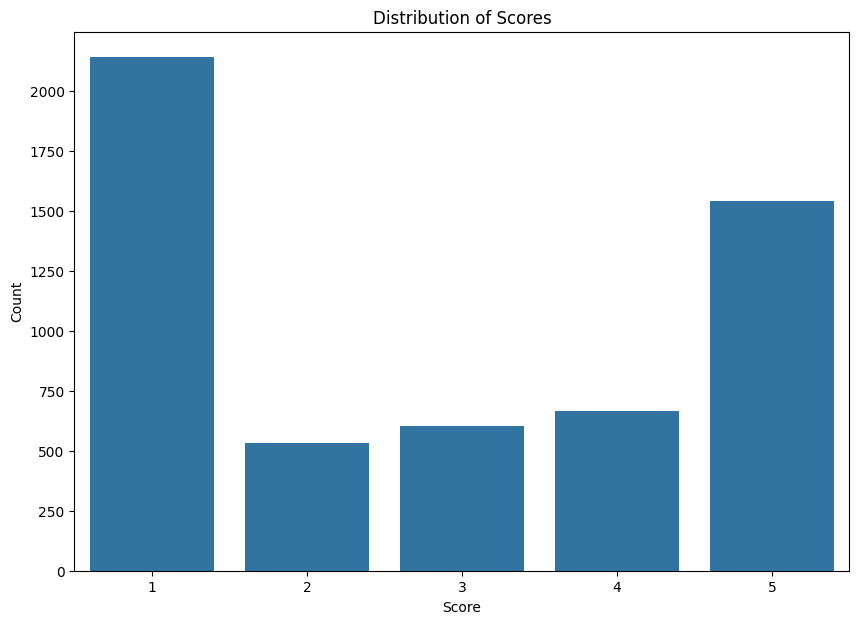

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of scores

plt.figure(figsize=(10,7))
sns.countplot(data=df_5_percent,x='score')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


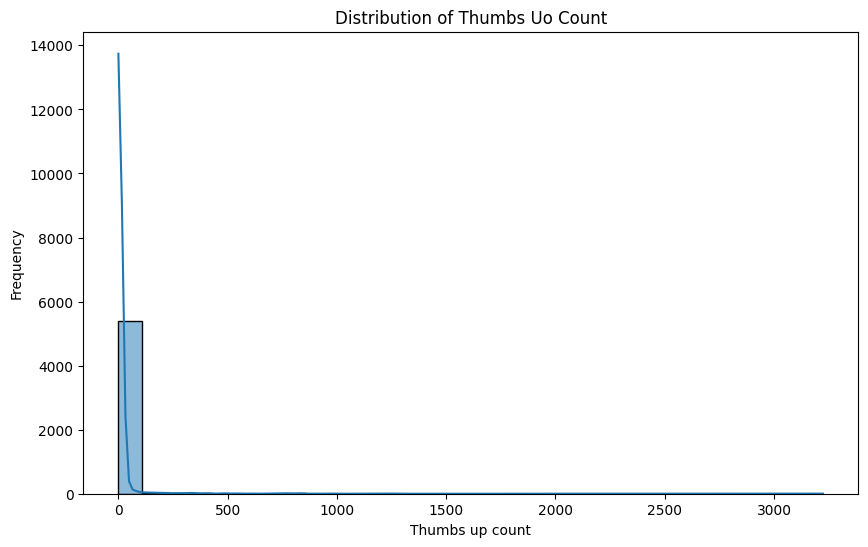

In [64]:
# Distribution of thumbsUpCount

plt.figure(figsize=(10, 6))
sns.histplot(df_5_percent['thumbsUpCount'], bins=30, kde=True)
plt.title('Distribution of Thumbs Uo Count')
plt.xlabel('Thumbs up count')
plt.ylabel('Frequency')
plt.show()

In [65]:
df_5_percent.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
65110,c8b4d988-0d3f-4e7f-b8b6-ca3e4f92b834,A Google user,Massive battery drain and runs so hot after re...,1,3,6.19.0 build 33 31560,2018-12-06 12:44:53,6.19.0 build 33 31560
92929,9ddc92b6-8bfe-4dcf-9671-d365790a0862,shay green,Good but need more films that are more popular...,3,0,7.81.1 build 19 35189,2020-11-09 19:28:01,7.81.1 build 19 35189
17738,f650c589-afe9-4608-b2ef-055f7e87b495,dougie miller,With all the money I & millions of others pay ...,2,3,8.64.0 build 8 50394,2023-04-14 05:03:47,8.64.0 build 8 50394
62476,e95ff7fe-7e8d-4869-966f-6177dbb76d7e,frances banuelos,I canceled my subscription and I'm still getti...,1,0,8.95.0 build 13 50554,2023-11-20 15:21:16,8.95.0 build 13 50554
74907,863a86c4-9ddc-40ed-ac0d-0861791eb33e,Kris Hickman,"I have enjoyed Netflix for years, but I cannot...",2,0,7.120.0 build 7 35589,2022-01-08 04:16:59,7.120.0 build 7 35589


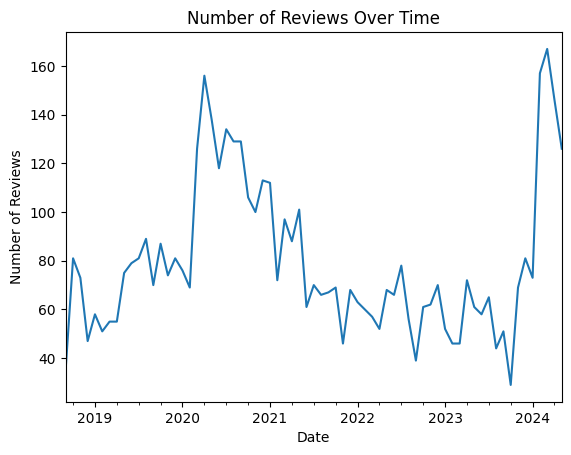

In [66]:
# Reviews over time
df_5_percent['at'] = pd.to_datetime(df_5_percent['at'])
df_5_percent.set_index('at', inplace=True)
df_5_percent['score'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


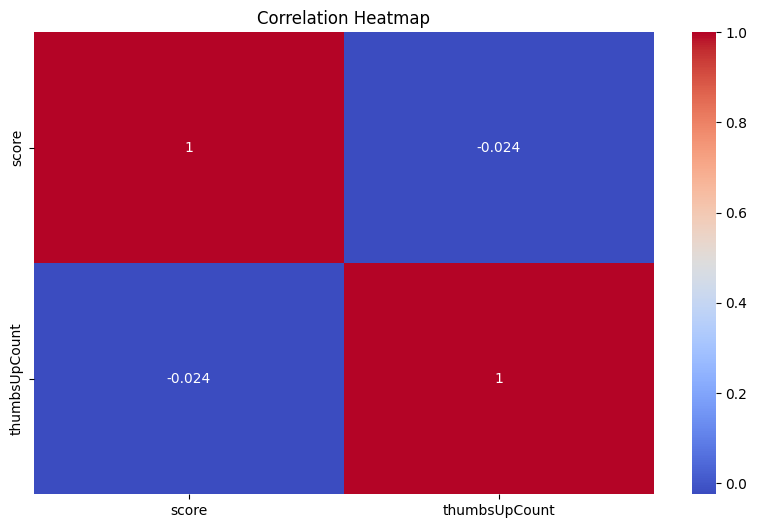

In [69]:
# Correlation heatmap

numeric_columns = df_5_percent.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df_5_percent[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [73]:

# Top 10 users by number of reviews
top_users = df_5_percent['userName'].value_counts().head(10)
print("Top 10 Users by Number of Reviews:\n", top_users)

# Top 10 versions by number of reviews
top_versions = df_5_percent['appVersion'].value_counts().head(10)
print("Top 10 App Versions by Number of Reviews:\n", top_versions)

Top 10 Users by Number of Reviews:
 userName
A Google user    1505
Alex                3
Sarah               2
David R             2
Josh                2
Mahesh Kumar        2
Diana               2
Lucifer             2
Cos B               2
Sam                 2
Name: count, dtype: int64
Top 10 App Versions by Number of Reviews:
 appVersion
7.84.1 build 28 35243     114
7.38.0 build 27 34635      82
8.96.1 build 16 50568      74
8.104.0 build 5 50619      69
8.105.0 build 15 50626     57
8.26.0 build 11 40221      52
8.11.1 build 12 40101      51
7.52.0 build 19 34798      50
8.52.2 build 14 50335      49
6.20.1 build 51 31579      46
Name: count, dtype: int64


In [75]:
df_5_percent['content'].dtype

dtype('O')

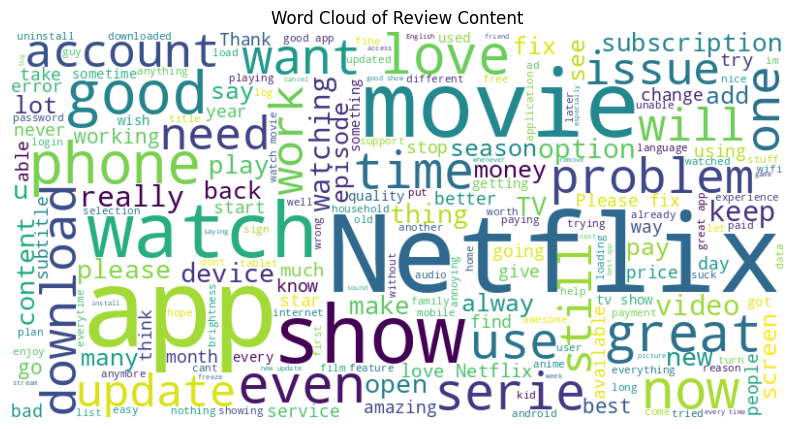

In [76]:
from wordcloud import WordCloud

df_5_percent['content'] = df_5_percent['content'].fillna('').astype(str)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_5_percent['content']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()

## Prepare data for ML model

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [81]:
# Step 2: Data Cleaning
def clean_data(dataframe):
    # Drop unnecessary columns (assuming 'Unnamed: 0' is an index column)
    #dataframe = dataframe.drop(columns=['Unnamed: 0'])

    # Handle missing values
    # Fill missing values in 'content' with an empty string
    dataframe['content'] = dataframe['content'].fillna('')

    # Fill missing values in 'reviewCreatedVersion' and 'appVersion' with 'unknown'
    dataframe['reviewCreatedVersion'] = dataframe['reviewCreatedVersion'].fillna('unknown')
    dataframe['appVersion'] = dataframe['appVersion'].fillna('unknown')

    # Convert 'at' column to datetime
   # dataframe['at'] = pd.to_datetime(dataframe['at'])

    # Ensure all 'content' entries are strings
    dataframe['content'] = dataframe['content'].astype(str)

    return dataframe

df_5_percent = clean_data(df_5_percent)
df_5_percent.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,appVersion
at,,,,,,,
2018-12-06 12:44:53,c8b4d988-0d3f-4e7f-b8b6-ca3e4f92b834,A Google user,Massive battery drain and runs so hot after re...,1,3,6.19.0 build 33 31560,6.19.0 build 33 31560
2020-11-09 19:28:01,9ddc92b6-8bfe-4dcf-9671-d365790a0862,shay green,Good but need more films that are more popular...,3,0,7.81.1 build 19 35189,7.81.1 build 19 35189
2023-04-14 05:03:47,f650c589-afe9-4608-b2ef-055f7e87b495,dougie miller,With all the money I & millions of others pay ...,2,3,8.64.0 build 8 50394,8.64.0 build 8 50394
2023-11-20 15:21:16,e95ff7fe-7e8d-4869-966f-6177dbb76d7e,frances banuelos,I canceled my subscription and I'm still getti...,1,0,8.95.0 build 13 50554,8.95.0 build 13 50554
2022-01-08 04:16:59,863a86c4-9ddc-40ed-ac0d-0861791eb33e,Kris Hickman,"I have enjoyed Netflix for years, but I cannot...",2,0,7.120.0 build 7 35589,7.120.0 build 7 35589


In [82]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Data Cleaning
df_5_percent['content'] = df_5_percent['content'].fillna('').astype(str)
df_5_percent['score'] = df_5_percent['score'].fillna(0).astype(int)

# Select relevant columns for NLP model
df_nlp = df_5_percent[['content', 'score']]

# Split the data into training and test sets
train_data, test_data = train_test_split(df_nlp, test_size=0.2, random_state=42)

# Parameters for text processing
vocab_size = 10000
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data['content'])

# Tokenize and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_data['content'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_data['content'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Prepare labels
train_labels = np.array(train_data['score'])
test_labels = np.array(test_data['score'])

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  # Assuming scores are 1 to 5, adjust as needed
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 644550 (2.46 MB)
Trainable params: 644550 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
137/137 - 4s - loss: 1.5531 - accuracy: 0.3898 - val_loss: 1.4879 - val_acc

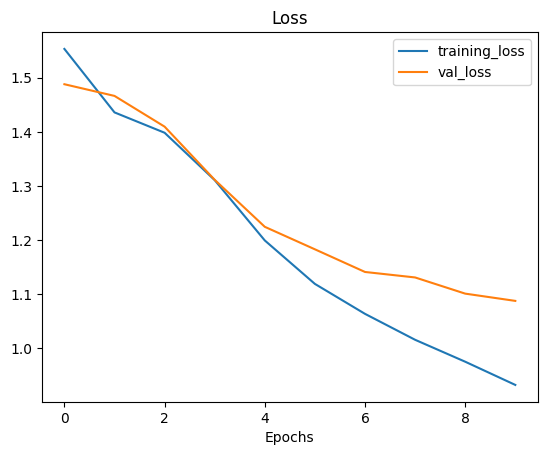

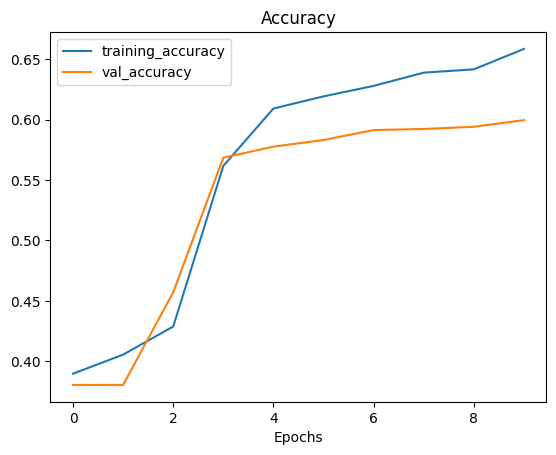

In [85]:
plot_loss_curves(history)

In [87]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

loss, accuracy = model.evaluate(test_padded, test_labels, verbose=2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

35/35 - 0s - loss: 1.0877 - accuracy: 0.5995 - 342ms/epoch - 10ms/step
Test loss: 1.0877065658569336
Test accuracy: 0.599452555179596


In [88]:
test_padded

array([[  3,  38,  68, ...,   0,   0,   0],
       [ 16,  66, 259, ...,   0,   0,   0],
       [ 34, 114,   4, ...,   0,   0,   0],
       ...,
       [ 86,  55,  10, ...,   0,   0,   0],
       [ 25,  24,   5, ...,   0,   0,   0],
       [ 10, 317, 113, ...,   0,   0,   0]], dtype=int32)

In [90]:
model_predictions = model.predict(test_padded)
predicted_classes = np.argmax(model_predictions, axis=1)
predicted_classes

35/35 [==============================] - 0s 4ms/step


array([5, 1, 5, ..., 1, 5, 1])

In [94]:
calculate_results(test_labels, predicted_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 59.94525547445255,
 'precision': 0.5527985678770262,
 'recall': 0.5994525547445255,
 'f1': 0.486939500899938}

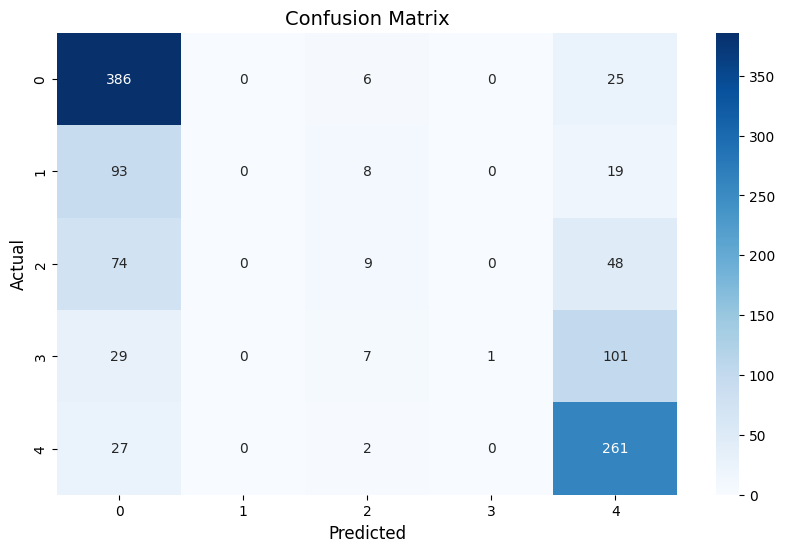

In [95]:
# prompt: create a nice confusion matrix with sns

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [96]:
# Compute accuracy
test_accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.5994525547445255


In [103]:
import numpy as np

input_text = ["Needs some fixing"]
def test_predictions(input_text):
  input_sequences = tokenizer.texts_to_sequences(input_text)
  input_padded = pad_sequences(input_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  # Make predictions

  predictions = model.predict(input_padded)
  predicted_classes = np.argmax(predictions, axis=1)

  # Display predictions

  for i, text in enumerate(input_text):
      print(f"Text: {text}")
      print(f"Predicted Class: {predicted_classes[i]}")
      print(f"Predicted Probability Distribution: {predictions[i]}")
      print("\n")

test_predictions(input_text)

1/1 [==============================] - 0s 183ms/step
Text: Needs some fixing
Predicted Class: 1
Predicted Probability Distribution: [1.0115281e-04 3.3995980e-01 1.0722147e-01 1.1957960e-01 1.4189352e-01
 2.9124442e-01]




35/35 - 0s - loss: 1.0877 - accuracy: 0.5995 - 348ms/epoch - 10ms/step
Test Loss: 1.0877065658569336
Test Accuracy: 0.599452555179596
35/35 [==============================] - 0s 9ms/step
Classification Report:
{'accuracy': 59.94525547445255, 'precision': 0.5527985678770262, 'recall': 0.5994525547445255, 'f1': 0.486939500899938}
Confusion Matrix:
[[386   0   6   0  25]
 [ 93   0   8   0  19]
 [ 74   0   9   0  48]
 [ 29   0   7   1 101]
 [ 27   0   2   0 261]]
Test Accuracy: 0.5994525547445255


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


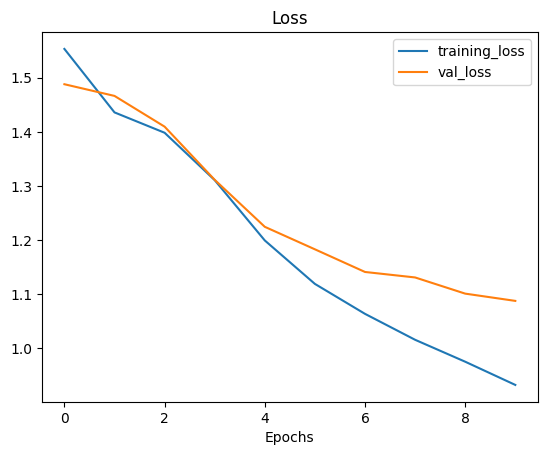

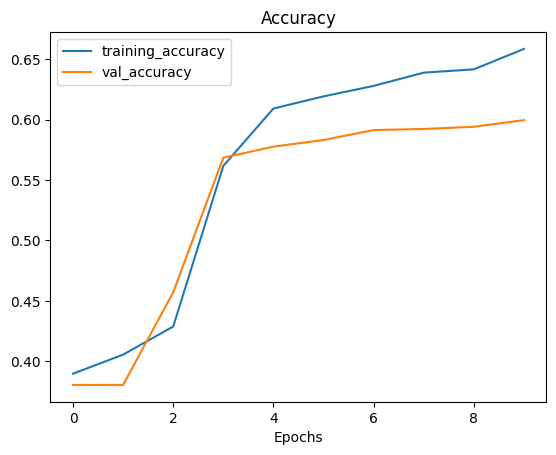

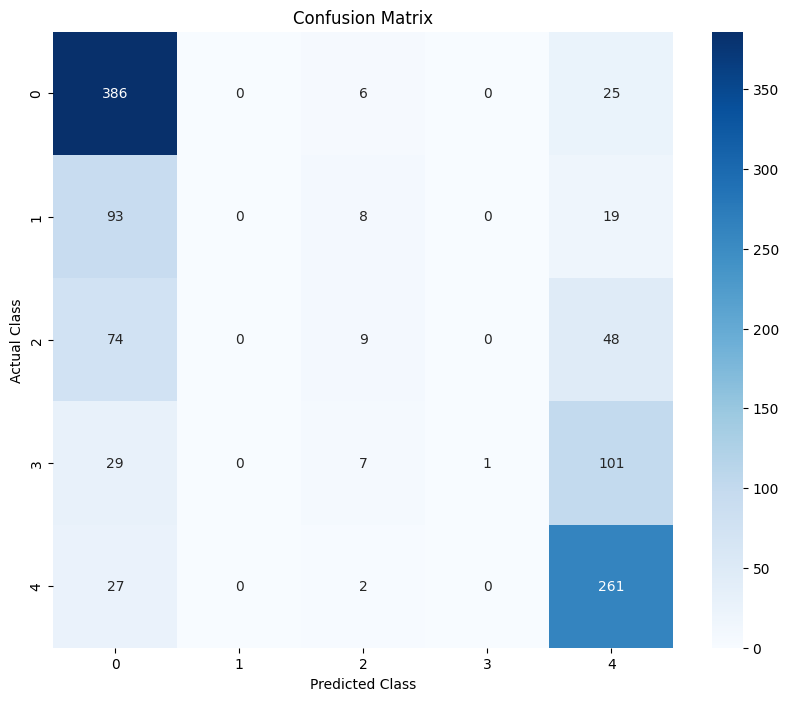

In [106]:
# Evaluate the model on the test set
def evaluate_model(model, history):
  loss, accuracy = model.evaluate(test_padded, test_labels, verbose=2)
  print(f"Test Loss: {loss}")
  print(f"Test Accuracy: {accuracy}")

  # Generate predictions
  predictions = model.predict(test_padded)
  predicted_classes = np.argmax(predictions, axis=1)

  # Print classification report
  print("Classification Report:")
  print(calculate_results(test_labels, predicted_classes))

  # Print confusion matrix
  print("Confusion Matrix:")
  print(confusion_matrix(test_labels, predicted_classes))

  # Compute accuracy
  test_accuracy = accuracy_score(test_labels, predicted_classes)
  print(f"Test Accuracy: {test_accuracy}")

  plot_loss_curves(history)

  # Optionally, visualize the confusion matrix
  import seaborn as sns
  import matplotlib.pyplot as plt

  conf_matrix = confusion_matrix(test_labels, predicted_classes)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.ylabel('Actual Class')
  plt.xlabel('Predicted Class')
  plt.show()
evaluate_model(model, history)

## Model 2

In [108]:

def earlyStop(patience=3):
  early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
  return early_stopping

In [112]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
     tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.LSTM(64, return_sequences=True),
     tf.keras.layers.LSTM(64),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(6, activation='softmax')

])

model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()

history_1 = model_1.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), callbacks=[earlyStop()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 196, 128)          82048     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 98, 128)           0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 98, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                      